## 1. Introduction

In [179]:
# (Optional) Sets option to show more columns in R
options(repr.matrix.max.cols=200, repr.matrix.max.rows=100)

# Load relevant packages
library(tidyverse)
library(ggplot2)

# Read in data
df <- read_csv('college-salaries/degrees-that-pay-back.csv', col_types = cols())

# Explore the dataset
sapply(df, class)
head(df)

Undergraduate Major 
                                      "character" 
                           Starting Median Salary 
                                      "character" 
                         Mid-Career Median Salary 
                                      "character" 
Percent change from Starting to Mid-Career Salary 
                                        "numeric" 
                Mid-Career 10th Percentile Salary 
                                      "character" 
                Mid-Career 25th Percentile Salary 
                                      "character" 
                Mid-Career 75th Percentile Salary 
                                      "character" 
                Mid-Career 90th Percentile Salary 
                                      "character"

Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"


## 2. Clean up data
These column names are a bit lengthy. Let's clean them up to be a bit easier to read and call.
Notice also that our salary data is in currency format, which R considers a string. Let's strip those special characters and convert the relevant columns to numeric. While we're at it, we can also convert the Percent Change column to a decimal value. 

In [251]:
df <- read_csv('college-salaries/degrees-that-pay-back.csv', col_types = cols())
# Remove spaces from column names for easier calling
names(df) <- make.names(names(df), unique=TRUE)
colnames(df) <- c('College.Major','Starting.Median.Salary','Mid.Career.Median.Salary','Career.Percent.Change',
                  '10th.Percentile','25th.Percentile','75th.Percentile','90th.Percentile')

# convert relevant columns to numeric
majors = df['College.Major']

salaries <- df %>%
    select(-College.Major) %>%
    mutate_all(function(x) as.numeric(gsub("[\\$,]","",x))) %>%
    mutate(Career.Percent.Change = Career.Percent.Change/100)
               
df = bind_cols(majors,salaries)
           
head(df)
sapply(df,class)

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Change,10th.Percentile,25th.Percentile,75th.Percentile,90th.Percentile
Accounting,46000,77100,0.676,42200,56100,108000,152000
Aerospace Engineering,57700,101000,0.750,64300,82100,127000,161000
Agriculture,42600,71900,0.688,36300,52100,96300,150000
Anthropology,36800,61500,0.671,33800,45500,89300,138000
Architecture,41600,76800,0.846,50600,62200,97000,136000
Art History,35800,64900,0.813,28800,42200,87400,125000


College.Major   Starting.Median.Salary Mid.Career.Median.Salary 
             "character"                "numeric"                "numeric" 
   Career.Percent.Change          10th.Percentile          25th.Percentile 
               "numeric"                "numeric"                "numeric" 
         75th.Percentile          90th.Percentile 
               "numeric"                "numeric"

## 3. Feature engineering
Add a few more useful columns

In [252]:
percentiles = df %>% select('10th.Percentile','25th.Percentile','75th.Percentile','90th.Percentile')
colnames(percentiles) <- c('Rank.10th','Rank.25th','Rank.75th','Rank.90th')

percentiles = percentiles %>%
    mutate_all(funs(dense_rank(desc(.)))) %>%
    mutate(Rank_Growth_Index = (Rank.10th - Rank.25th) + (Rank.25th - Rank.75th) 
                            + (Rank.75th - Rank.90th))

df = bind_cols(df,percentiles)
df

College.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Career.Percent.Change,10th.Percentile,25th.Percentile,75th.Percentile,90th.Percentile,Rank.10th,Rank.25th,Rank.75th,Rank.90th,Rank_Growth_Index
Accounting,46000,77100,0.676,42200,56100,108000,152000,18,21,15,17,1
Aerospace Engineering,57700,101000,0.750,64300,82100,127000,161000,5,4,7,12,-7
Agriculture,42600,71900,0.688,36300,52100,96300,150000,30,26,24,18,12
Anthropology,36800,61500,0.671,33800,45500,89300,138000,36,35,28,25,11
Architecture,41600,76800,0.846,50600,62200,97000,136000,11,14,22,26,-15
Art History,35800,64900,0.813,28800,42200,87400,125000,44,40,31,33,11
Biology,38800,64800,0.670,36900,47400,94500,135000,28,33,25,27,1
Business Management,43000,72100,0.677,38800,51500,102000,147000,23,27,17,21,2
Chemical Engineering,63200,107000,0.693,71900,87300,143000,194000,1,1,2,3,-2
Chemistry,42600,79900,0.876,45300,60700,108000,148000,14,16,15,20,-6


## 4. Elbow Method

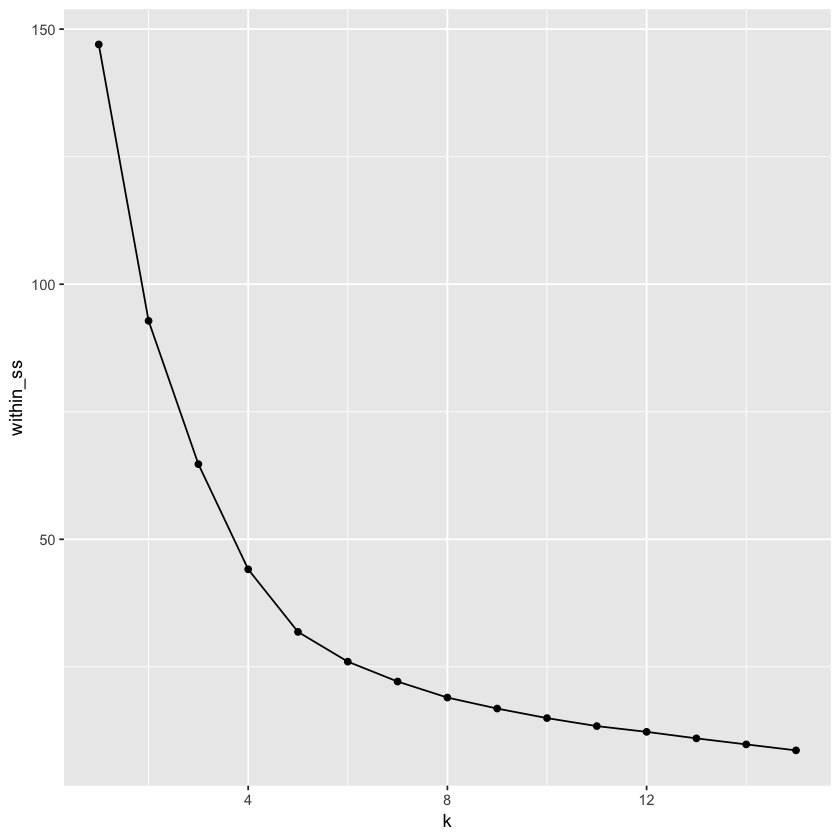

In [253]:
# scaling the data
k_means_data <- df %>%
    select(Mid.Career.Median.Salary, Career.Percent.Change, Rank_Growth_Index) %>%
    scale()

#optimal number of clusters - Elbow Method
set.seed(7)
max_k <- 15
sse <- sapply(1:max_k, 
                    function(k){kmeans(k_means_data, k, nstart=50,iter.max = 15 )$tot.withinss})

#graph it
max_k = as.data.frame(c(1:15))
colnames(max_k) = c('k')
clusters = bind_cols(max_k,as.data.frame(sse))
ggplot(clusters,aes(x=k,y=within_ss)) +
    geom_point() +
    geom_line()

## 5. K-means algorithm

In [254]:
# running algorithm with 5 clusters
k_means <- kmeans(k_means_data , 5 , iter.max = 15, nstart =100)
df$clusters <- k_means[[1]]

## 6. Visualize Clusters

Using College.Major as id variables


College.Major,variable,value
Aerospace Engineering,10th.Percentile,64300
Architecture,10th.Percentile,50600
Chemical Engineering,10th.Percentile,71900
Chemistry,10th.Percentile,45300
Civil Engineering,10th.Percentile,63400
Computer Engineering,10th.Percentile,66100
Computer Science,10th.Percentile,56000
Construction,10th.Percentile,56300
Electrical Engineering,10th.Percentile,69300
Industrial Engineering,10th.Percentile,57100


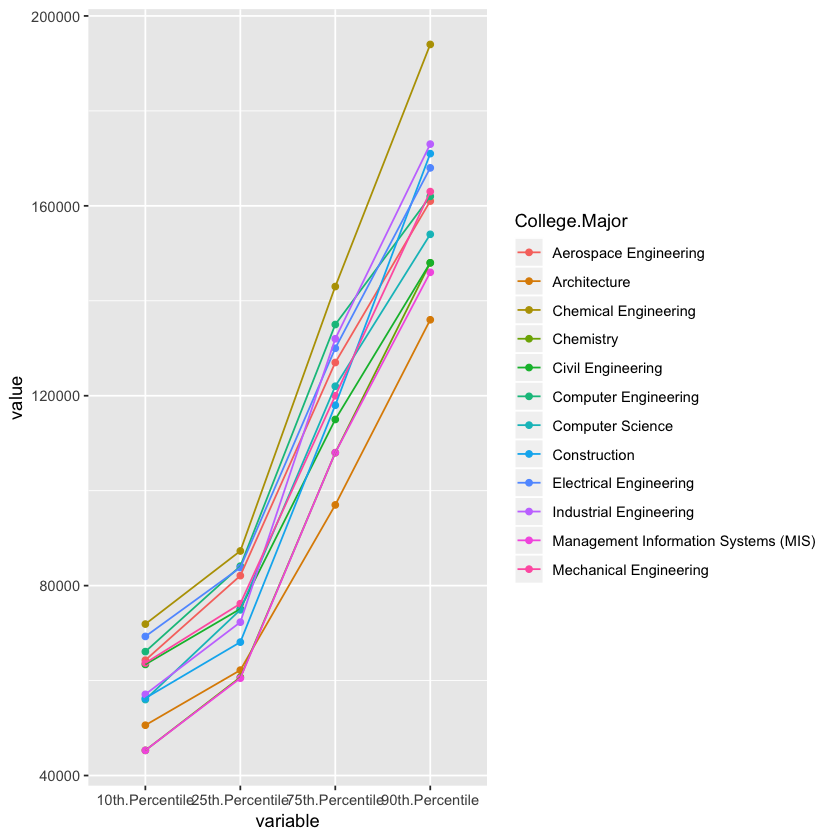

In [318]:
library(reshape2)
# c1 <- df %>%
#     select('College.Major', '10th.Percentile', '25th.Percentile', '75th.Percentile', '90th.Percentile', 'clusters')
# c1 <- c1 %>%
#     gather(key=percentile, value=salary, -c(College.Major, clusters)) 

# c1 <- select(df,'College.Major', '10th.Percentile', '25th.Percentile', '75th.Percentile', '90th.Percentile', 'clusters')
c1 <- df[df$clusters ==2,c(1,5,6,7,8)]
c1 <- as.data.frame(melt(c1))
c1
ggplot(c1, aes(x=variable,y=value, group=College.Major, color=College.Major)) +
    geom_point() +
    geom_line()

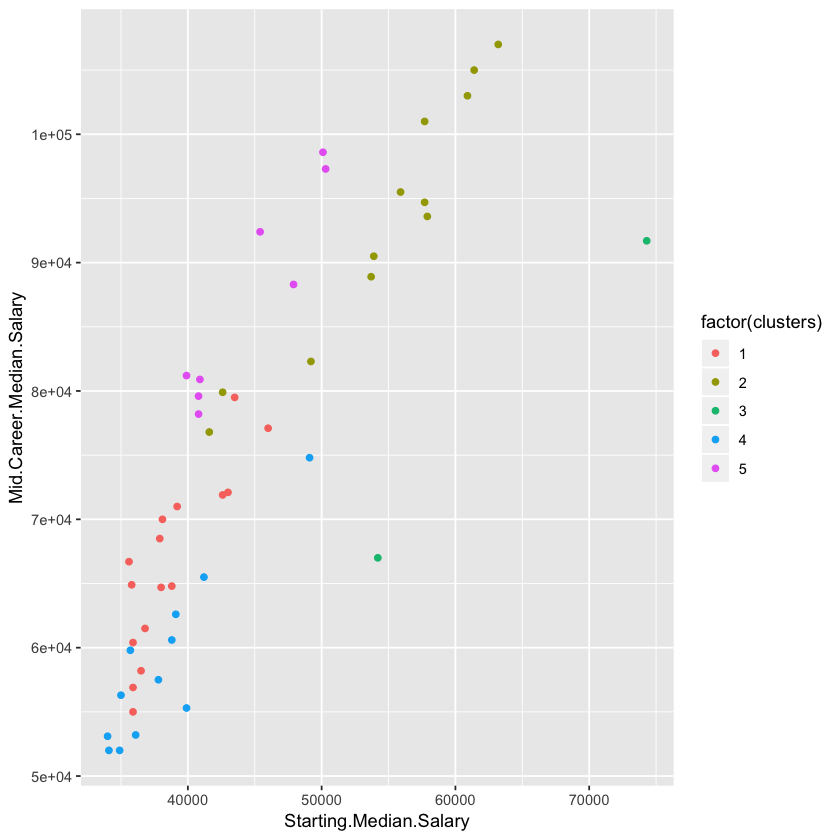

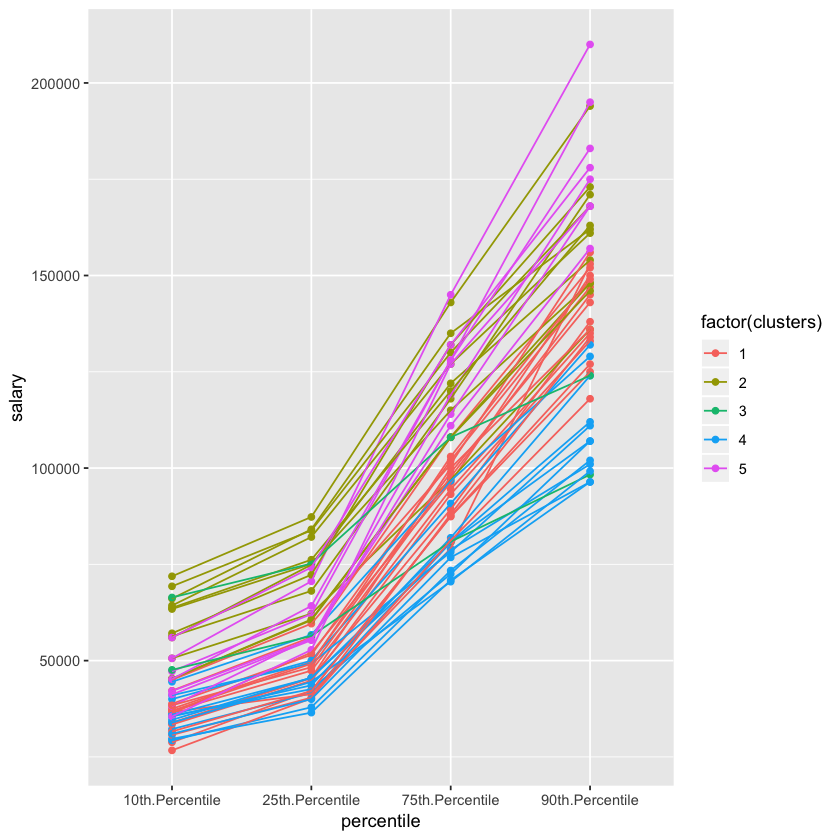

In [324]:
ggplot(df, aes(x=Starting.Median.Salary,y=Mid.Career.Median.Salary,color=factor(clusters))) +
geom_point()

c1 <- df %>%
    select('College.Major', '10th.Percentile', '25th.Percentile', '75th.Percentile', '90th.Percentile', 'clusters')
c1 <- c1 %>%
    gather(key=percentile, value=salary, -c(College.Major, clusters)) 

ggplot(c1, aes(x=percentile,y=salary,color=factor(clusters),group=College.Major)) +
geom_point() +
geom_line()